univariate analysis  
numerical: box plot, dist plot, hist plot  
catergory: count plot  

multivariate analysis


In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
df = pd.read_csv('metrics_per_salesterritory.csv')

In [174]:
# Convert 'OrderDate' to datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Set 'OrderDate' as the index
df.set_index('OrderDate', inplace=True)

In [175]:
df['TerritoryID'] = df['TerritoryID'].astype('category')

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5832 entries, 2011-05-31 to 2014-06-30
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   TerritoryID               5832 non-null   category
 1   TotalRevenue              5832 non-null   float64 
 2   Average Profit Margin     5832 non-null   float64 
 3   OrderQty                  5832 non-null   float64 
 4   UnitPrice                 5832 non-null   float64 
 5   UnitPriceDiscount         5832 non-null   float64 
 6   TaxAmt                    5832 non-null   float64 
 7   Freight                   5832 non-null   float64 
 8   Average_Revenue_Per_User  5832 non-null   float64 
dtypes: category(1), float64(8)
memory usage: 416.1 KB


### label TerritoryID

In [177]:
territory_mapping = {
    1: "Northwest, US",
    2: "Northeast, US",
    3: "Central, US",
    4: "Southwest, US",
    5: "Southeast, US",
    6: "Canada",
    7: "France",
    8: "Germany",
    9: "Australia",
    10: " United Kingdom" 
}

df['TerritoryName'] = df['TerritoryID'].map(territory_mapping)

df.insert(1, 'TerritoryName', df.pop('TerritoryName'))

In [178]:
# Desired column order
desired_order = [
    'TerritoryID', 'TerritoryName', 'OrderQty', 'UnitPrice', 'UnitPriceDiscount', 'TaxAmt', 'Freight',
    'TotalRevenue', 'Average Profit Margin',
    'Average_Revenue_Per_User'
]

# Reorder columns
df = df[desired_order]

In [188]:
df.head()

,TerritoryID,TerritoryName,OrderQty,UnitPrice,UnitPriceDiscount,TaxAmt,Freight,TotalRevenue,Average Profit Margin,Average_Revenue_Per_User
OrderDate,,,,,,,,,,
2011-05-31,1,"Northwest, US",96.0,48231.2437,0.0,7784.447608,2432.639873,97305.5951,437.498446,13900.799300
2011-05-31,2,"Northeast, US",35.0,12131.5067,0.0,1107.755176,346.173489,13846.9397,-128.293004,3461.734925
2011-05-31,3,"Central, US",40.0,13886.5012,0.0,1539.445144,481.076606,19243.0643,174.893383,4810.766075
2011-05-31,4,"Southwest, US",209.0,23173.7255,0.0,5580.654712,1743.954593,69758.1839,-4072.209214,9965.454843
2011-05-31,5,"Southeast, US",126.0,60322.7235,0.0,10030.132072,3134.416266,125376.6509,529.687827,13930.738989


In [180]:
# Check for skewness in numerical columns
numerical_cols = df.select_dtypes(include=['float64']).columns
skewness = df[numerical_cols].skew()

print("Skewness in numerical columns:")
print(skewness)

Skewness in numerical columns:
OrderQty                     7.587583
UnitPrice                    6.031069
UnitPriceDiscount           13.901498
TaxAmt                       6.640112
Freight                      6.640112
TotalRevenue                 6.640112
Average Profit Margin        1.601521
Average_Revenue_Per_User     5.238421
dtype: float64


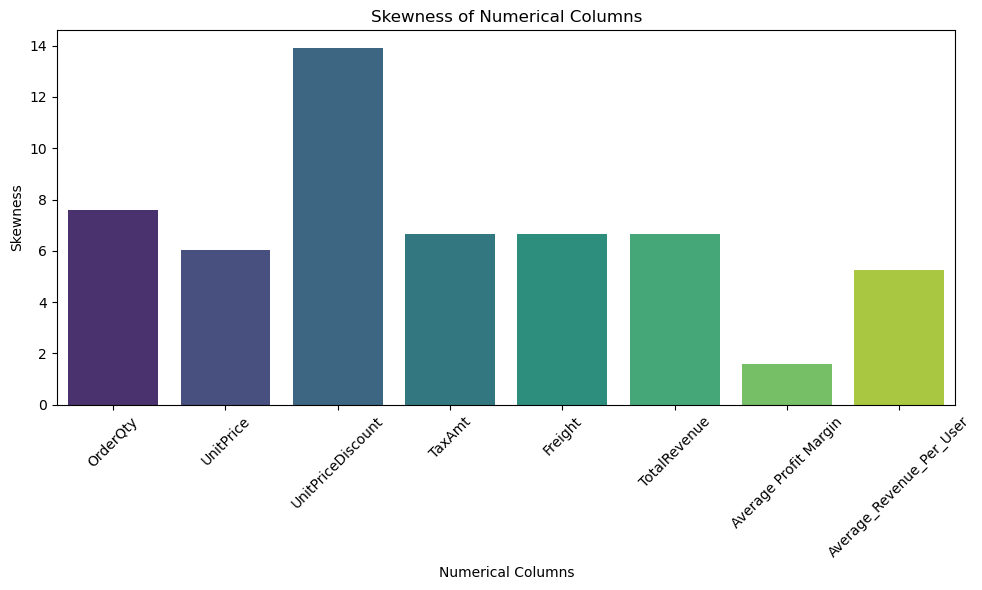

In [181]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=skewness.index, y=skewness.values, hue=skewness.index, palette='viridis')

plt.title('Skewness of Numerical Columns')
plt.xlabel('Numerical Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [182]:
df.columns

Index(['TerritoryID', 'TerritoryName', 'OrderQty', 'UnitPrice',
       'UnitPriceDiscount', 'TaxAmt', 'Freight', 'TotalRevenue',
       'Average Profit Margin', 'Average_Revenue_Per_User'],
      dtype='object')

In [186]:
import numpy as np

# Step 1: Check the unique values in the column
print(df['Average_Revenue_Per_User'].max(skipna=True))

# Step 2: Check data types
print("\nData type of 'Average Profit Margin':", df['Average_Revenue_Per_User'].dtype)

# Step 3: Check for NaN values
nan_count = df['Average_Revenue_Per_User'].isna().sum()
print("\nNumber of NaN values:", nan_count)

# Count the number of occurrences of 0 in the column
zero_count = np.isclose(df['Average_Revenue_Per_User'], 0.0).sum()
print(f"Frequency of 0 in 'float_column': {zero_count}")

zero_count = (df['Average_Revenue_Per_User'] == 0).sum()
print("\nExact count of zeros:", zero_count)

63811.5200822

Data type of 'Average Profit Margin': float64

Number of NaN values: 0
Frequency of 0 in 'float_column': 1

Exact count of zeros: 1


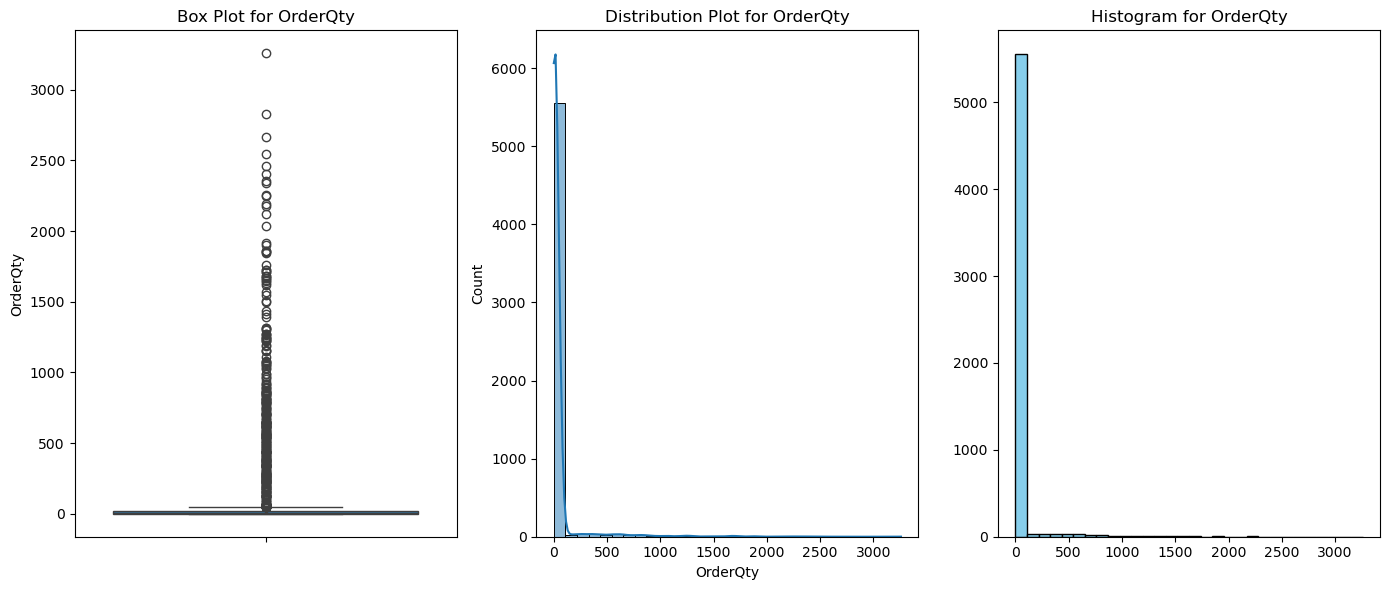

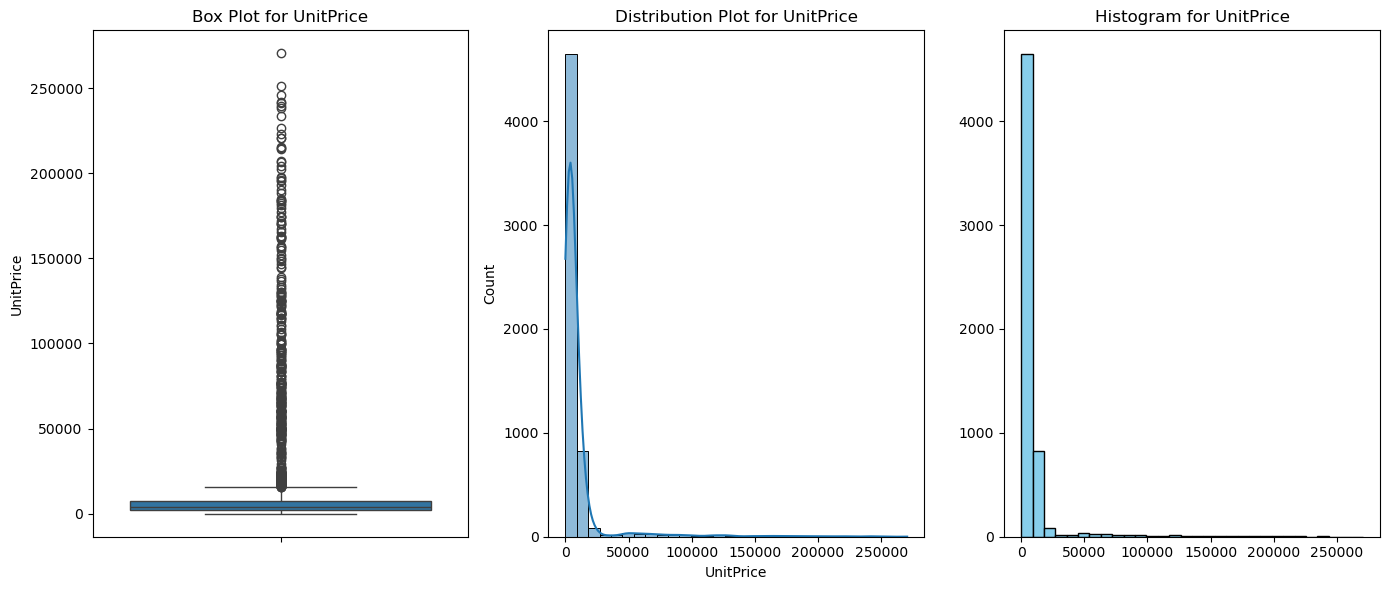

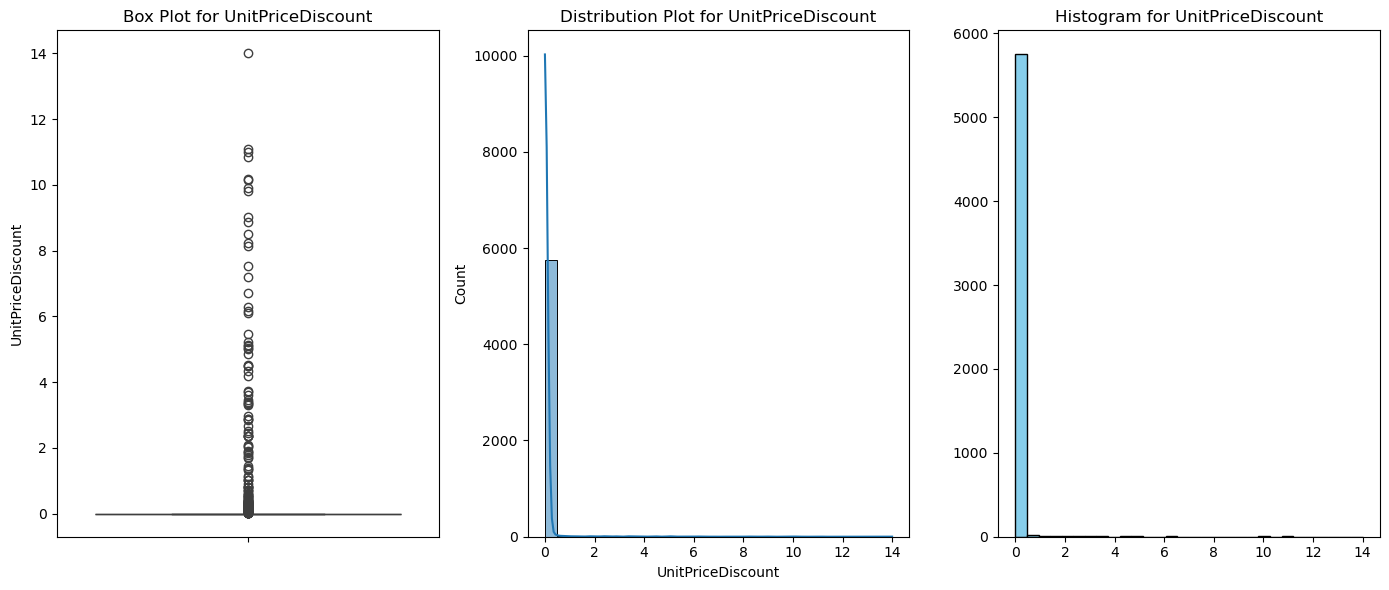

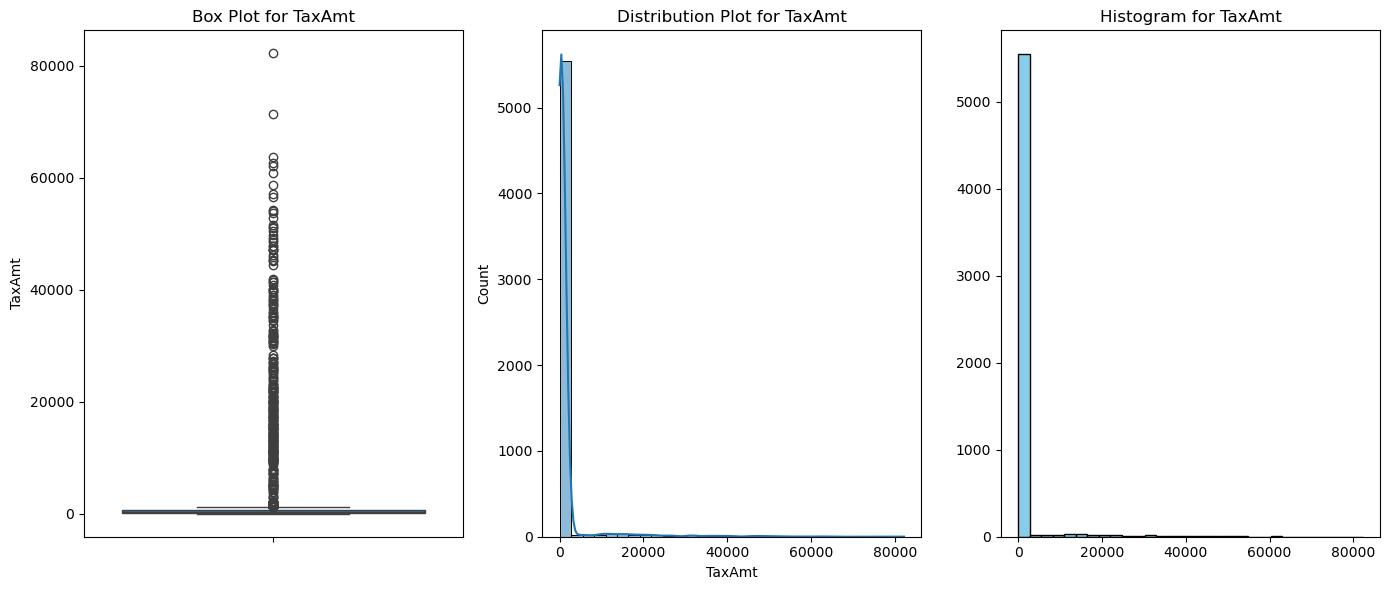

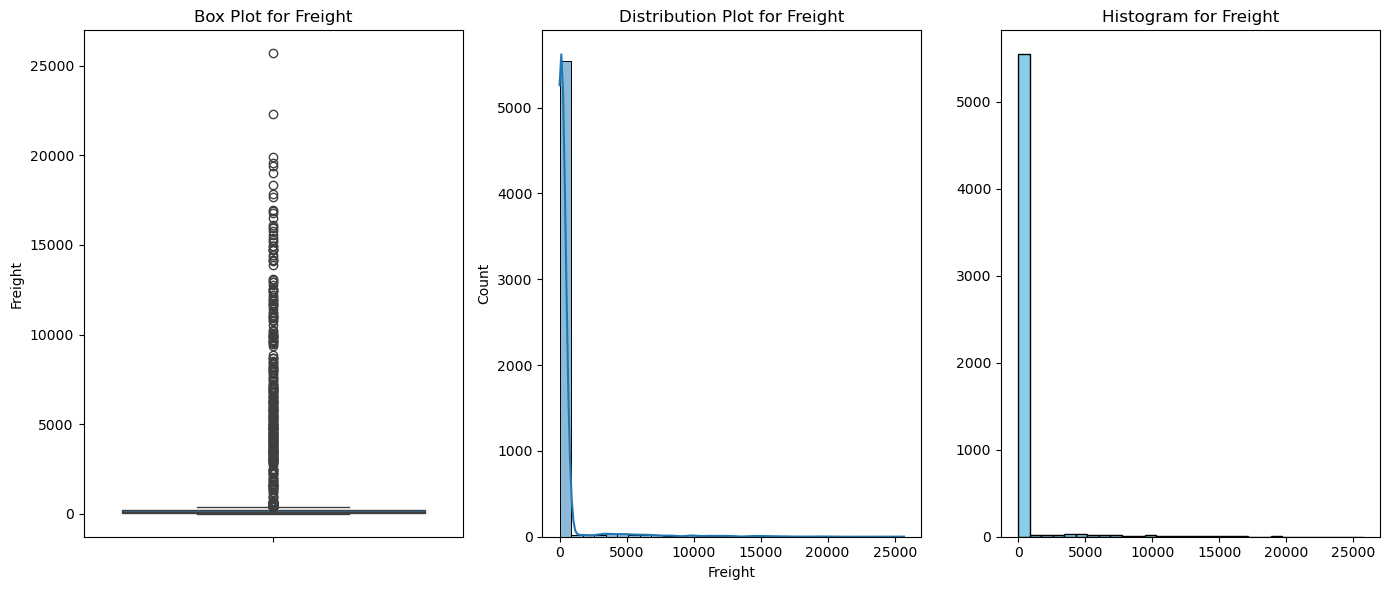

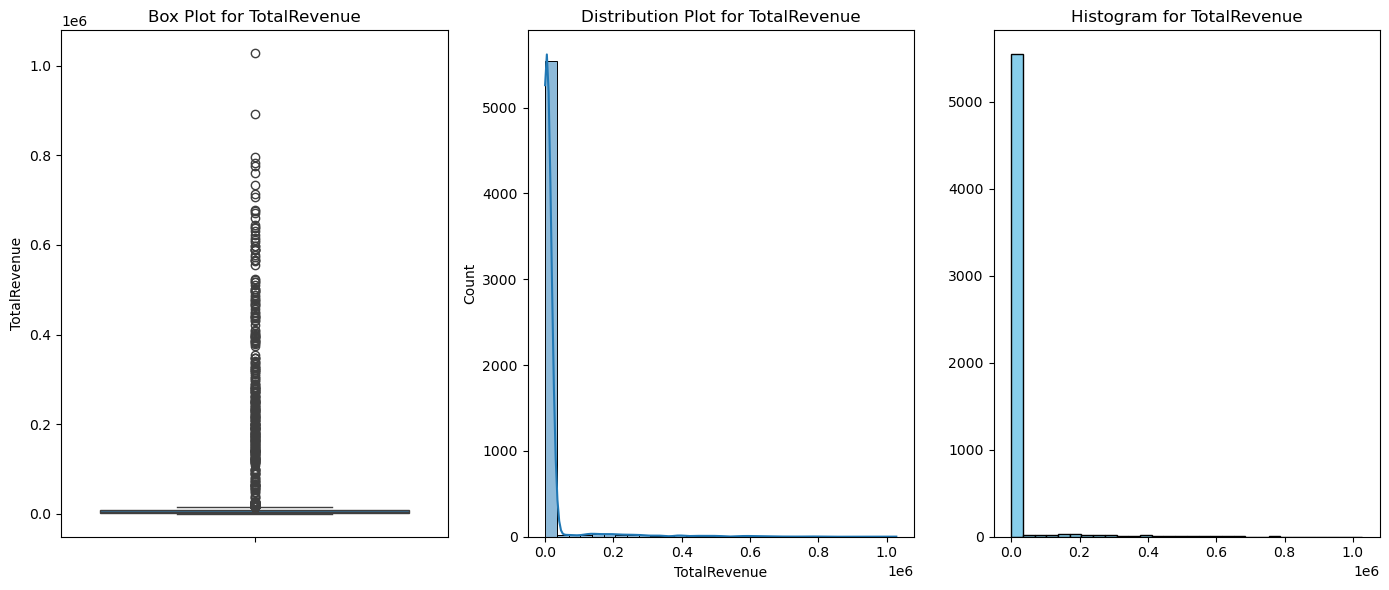

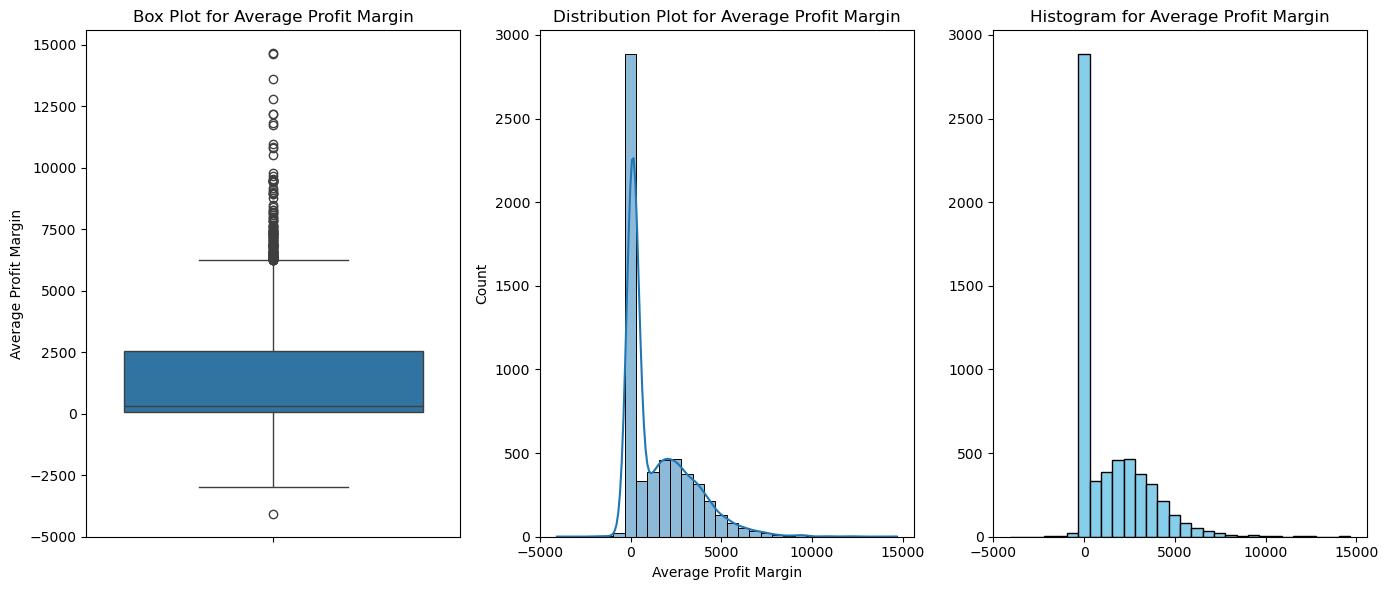

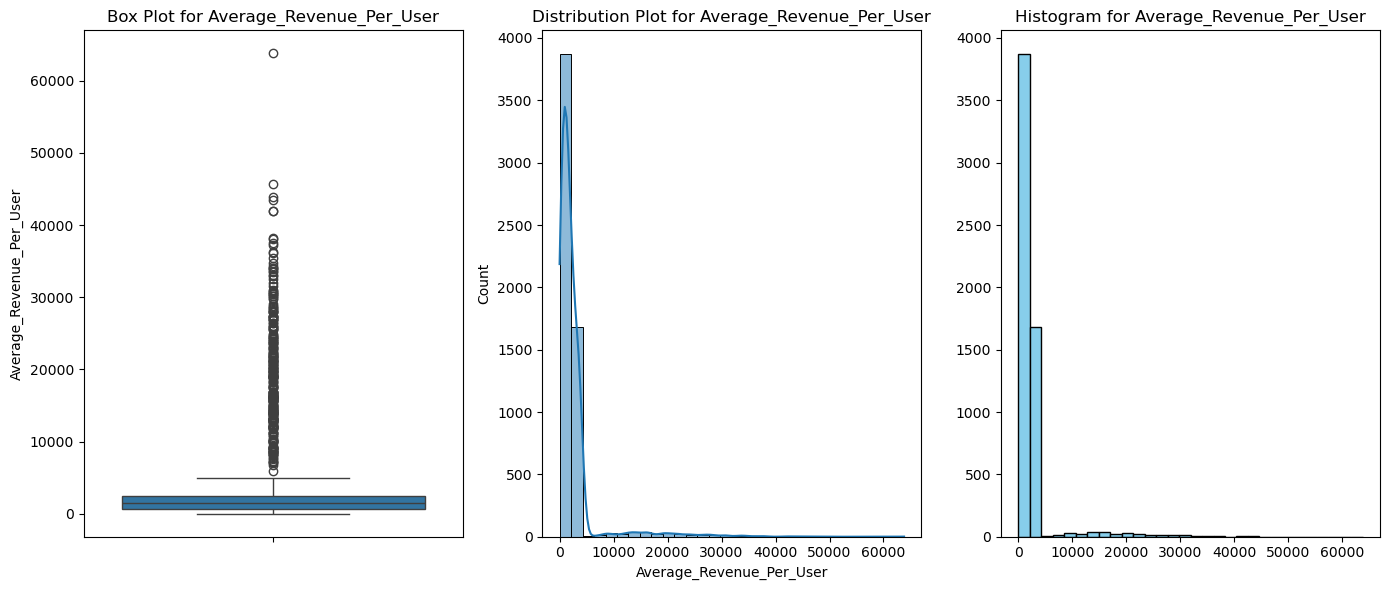

In [134]:
# Assume FactSales is your DataFrame
numeric_cols = df.select_dtypes(include='number').columns  # Select only numeric columns

# Create a directory of plots for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(14, 6))
    
    # Box Plot
    plt.subplot(1, 3, 1)  # Create subplot (1 row, 3 columns, 1st plot)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot for {col}')
    
    # Dist Plot
    plt.subplot(1, 3, 2)  # Create subplot (1 row, 3 columns, 2nd plot)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution Plot for {col}')
    
    # Hist Plot
    plt.subplot(1, 3, 3)  # Create subplot (1 row, 3 columns, 3rd plot)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram for {col}')
    
    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

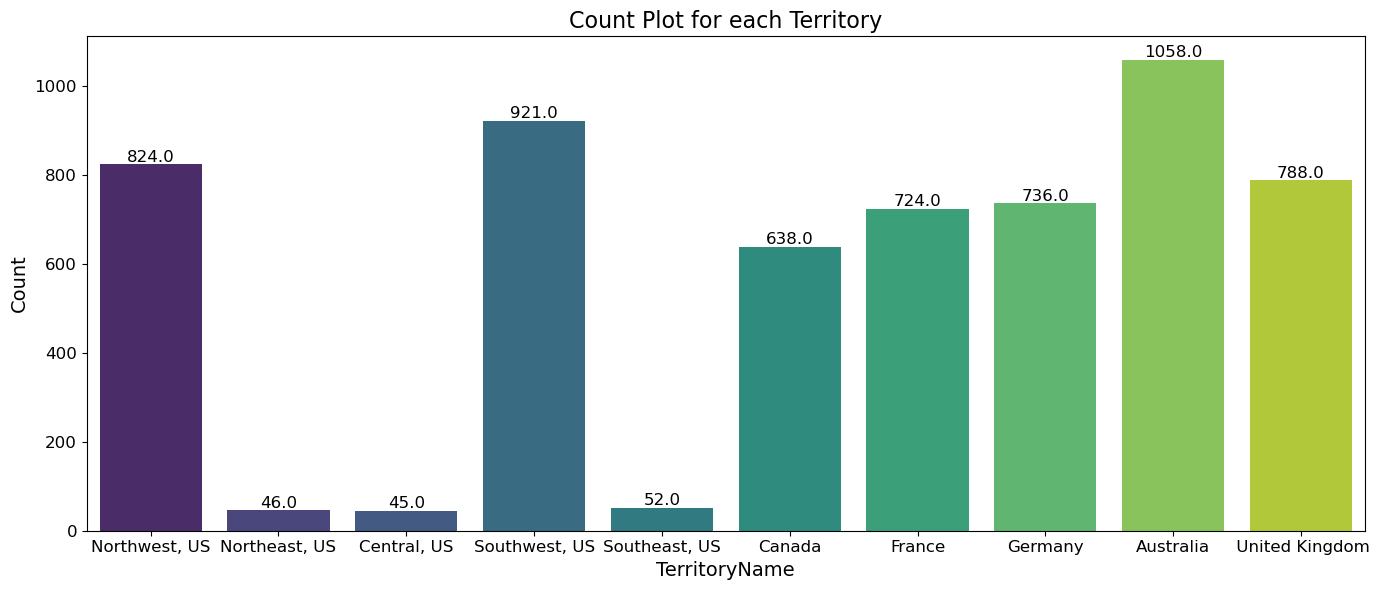

In [135]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(data=df, x='TerritoryName', hue='TerritoryName', palette='viridis', legend=False)

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() /2, height),
                xytext=(0,5),
                textcoords='offset points',
                ha='center', va='center', fontsize=12)

# Customize the plot
plt.title('Count Plot for each Territory', fontsize=16)
plt.xlabel('TerritoryName', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

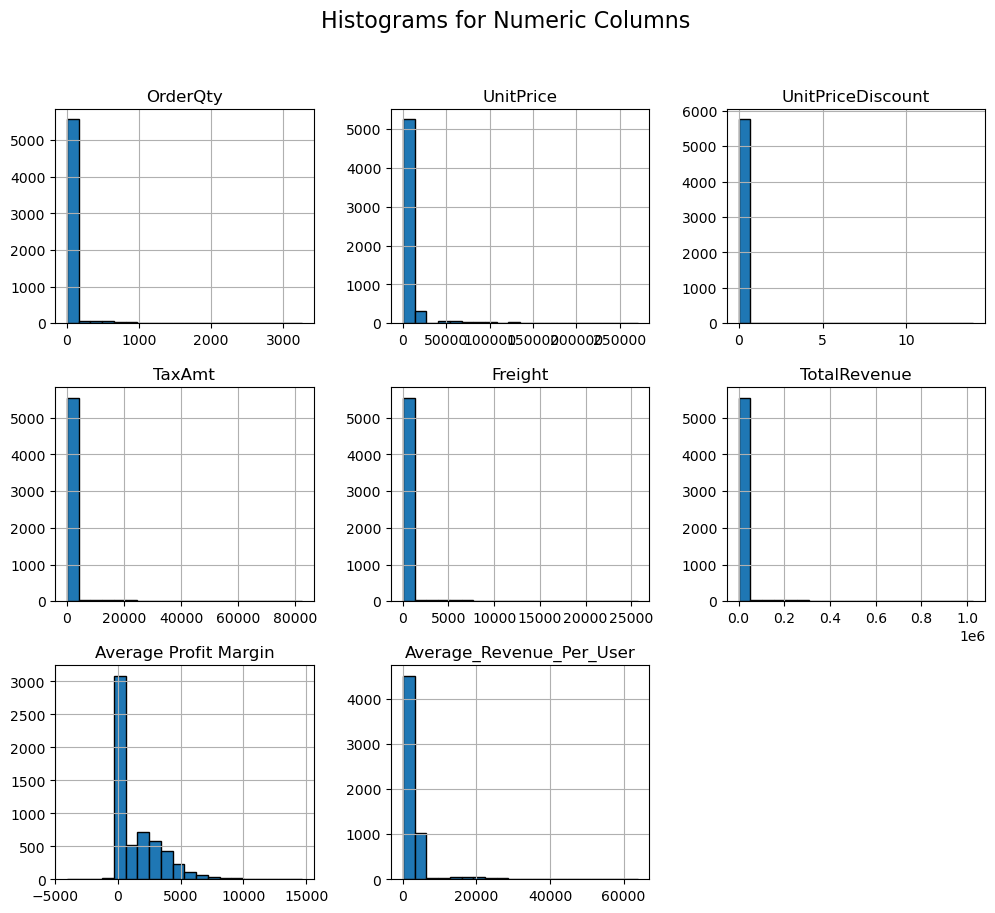

In [136]:
# Histograms for all numeric columns
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms for Numeric Columns", fontsize=16)
plt.show()


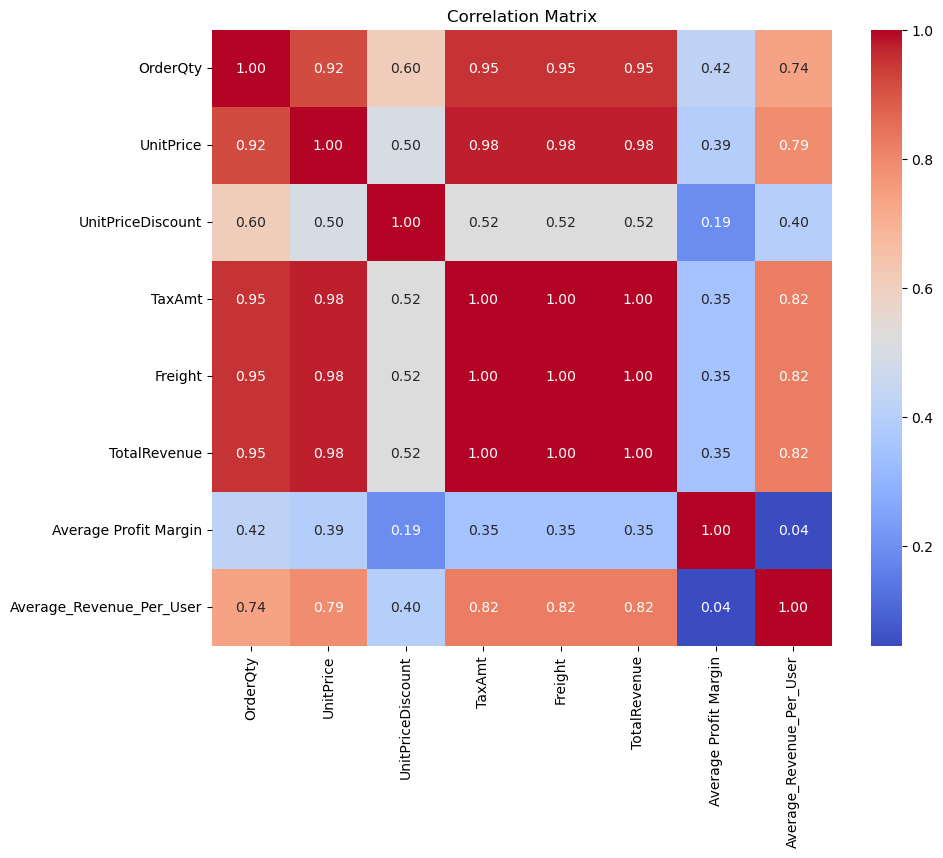

In [137]:
import numpy as np

# Correlation matrix and heatmap
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5832 entries, 2011-05-31 to 2014-06-30
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   TerritoryID               5832 non-null   category
 1   TerritoryName             5832 non-null   category
 2   OrderQty                  5832 non-null   float64 
 3   UnitPrice                 5832 non-null   float64 
 4   UnitPriceDiscount         5832 non-null   float64 
 5   TaxAmt                    5832 non-null   float64 
 6   Freight                   5832 non-null   float64 
 7   TotalRevenue              5832 non-null   float64 
 8   Average Profit Margin     5832 non-null   float64 
 9   Average_Revenue_Per_User  5832 non-null   float64 
dtypes: category(2), float64(8)
memory usage: 422.2 KB


Text(0.5, 1.02, 'Pairwise Scatter Plots')

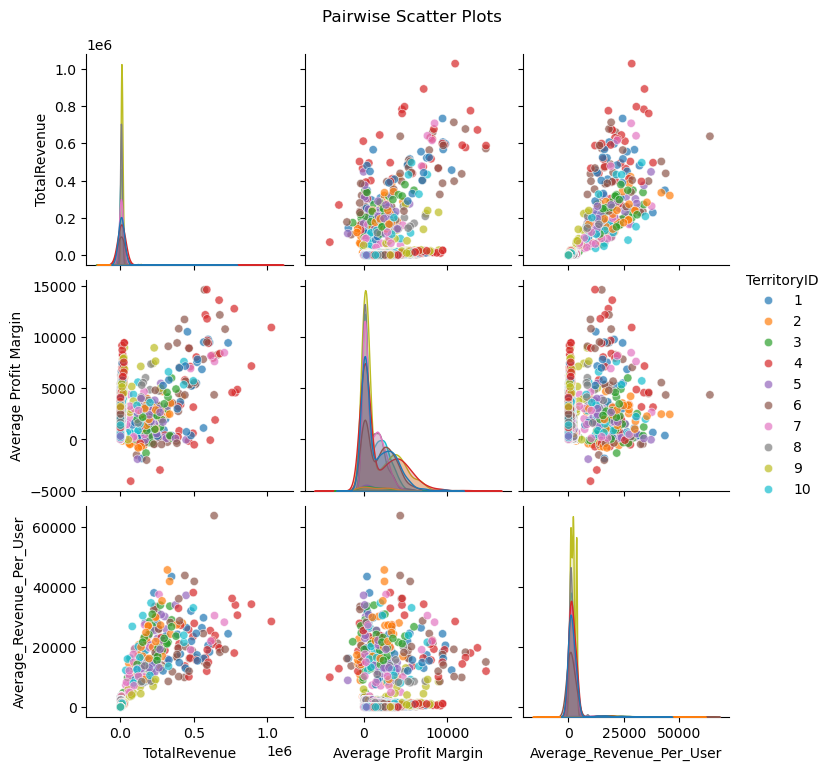

In [139]:
# selected_features = ['OrderQty', 'UnitPrice', 'UnitPriceDiscount', 'TaxAmt', 'Freight']
selected_features = ['TotalRevenue', 'Average Profit Margin', 'Average_Revenue_Per_User']
hue_column = 'TerritoryID'

sns.pairplot(df[selected_features + [hue_column]], diag_kind='kde', hue='TerritoryID', kind='scatter', plot_kws={'alpha': 0.7})

plt.suptitle("Pairwise Scatter Plots", y=1.02)

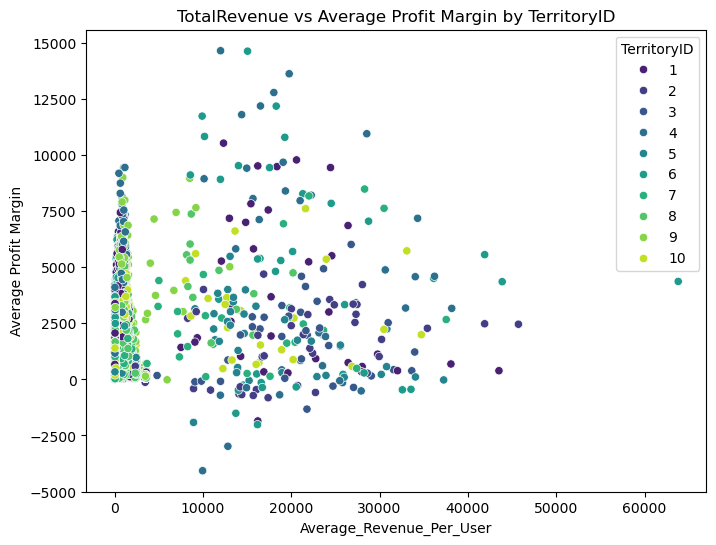

In [140]:
# Scatter plot: TotalRevenue vs Average Profit Margin
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Average_Revenue_Per_User', y='Average Profit Margin', hue='TerritoryID', palette='viridis')
plt.title('TotalRevenue vs Average Profit Margin by TerritoryID')
plt.show()


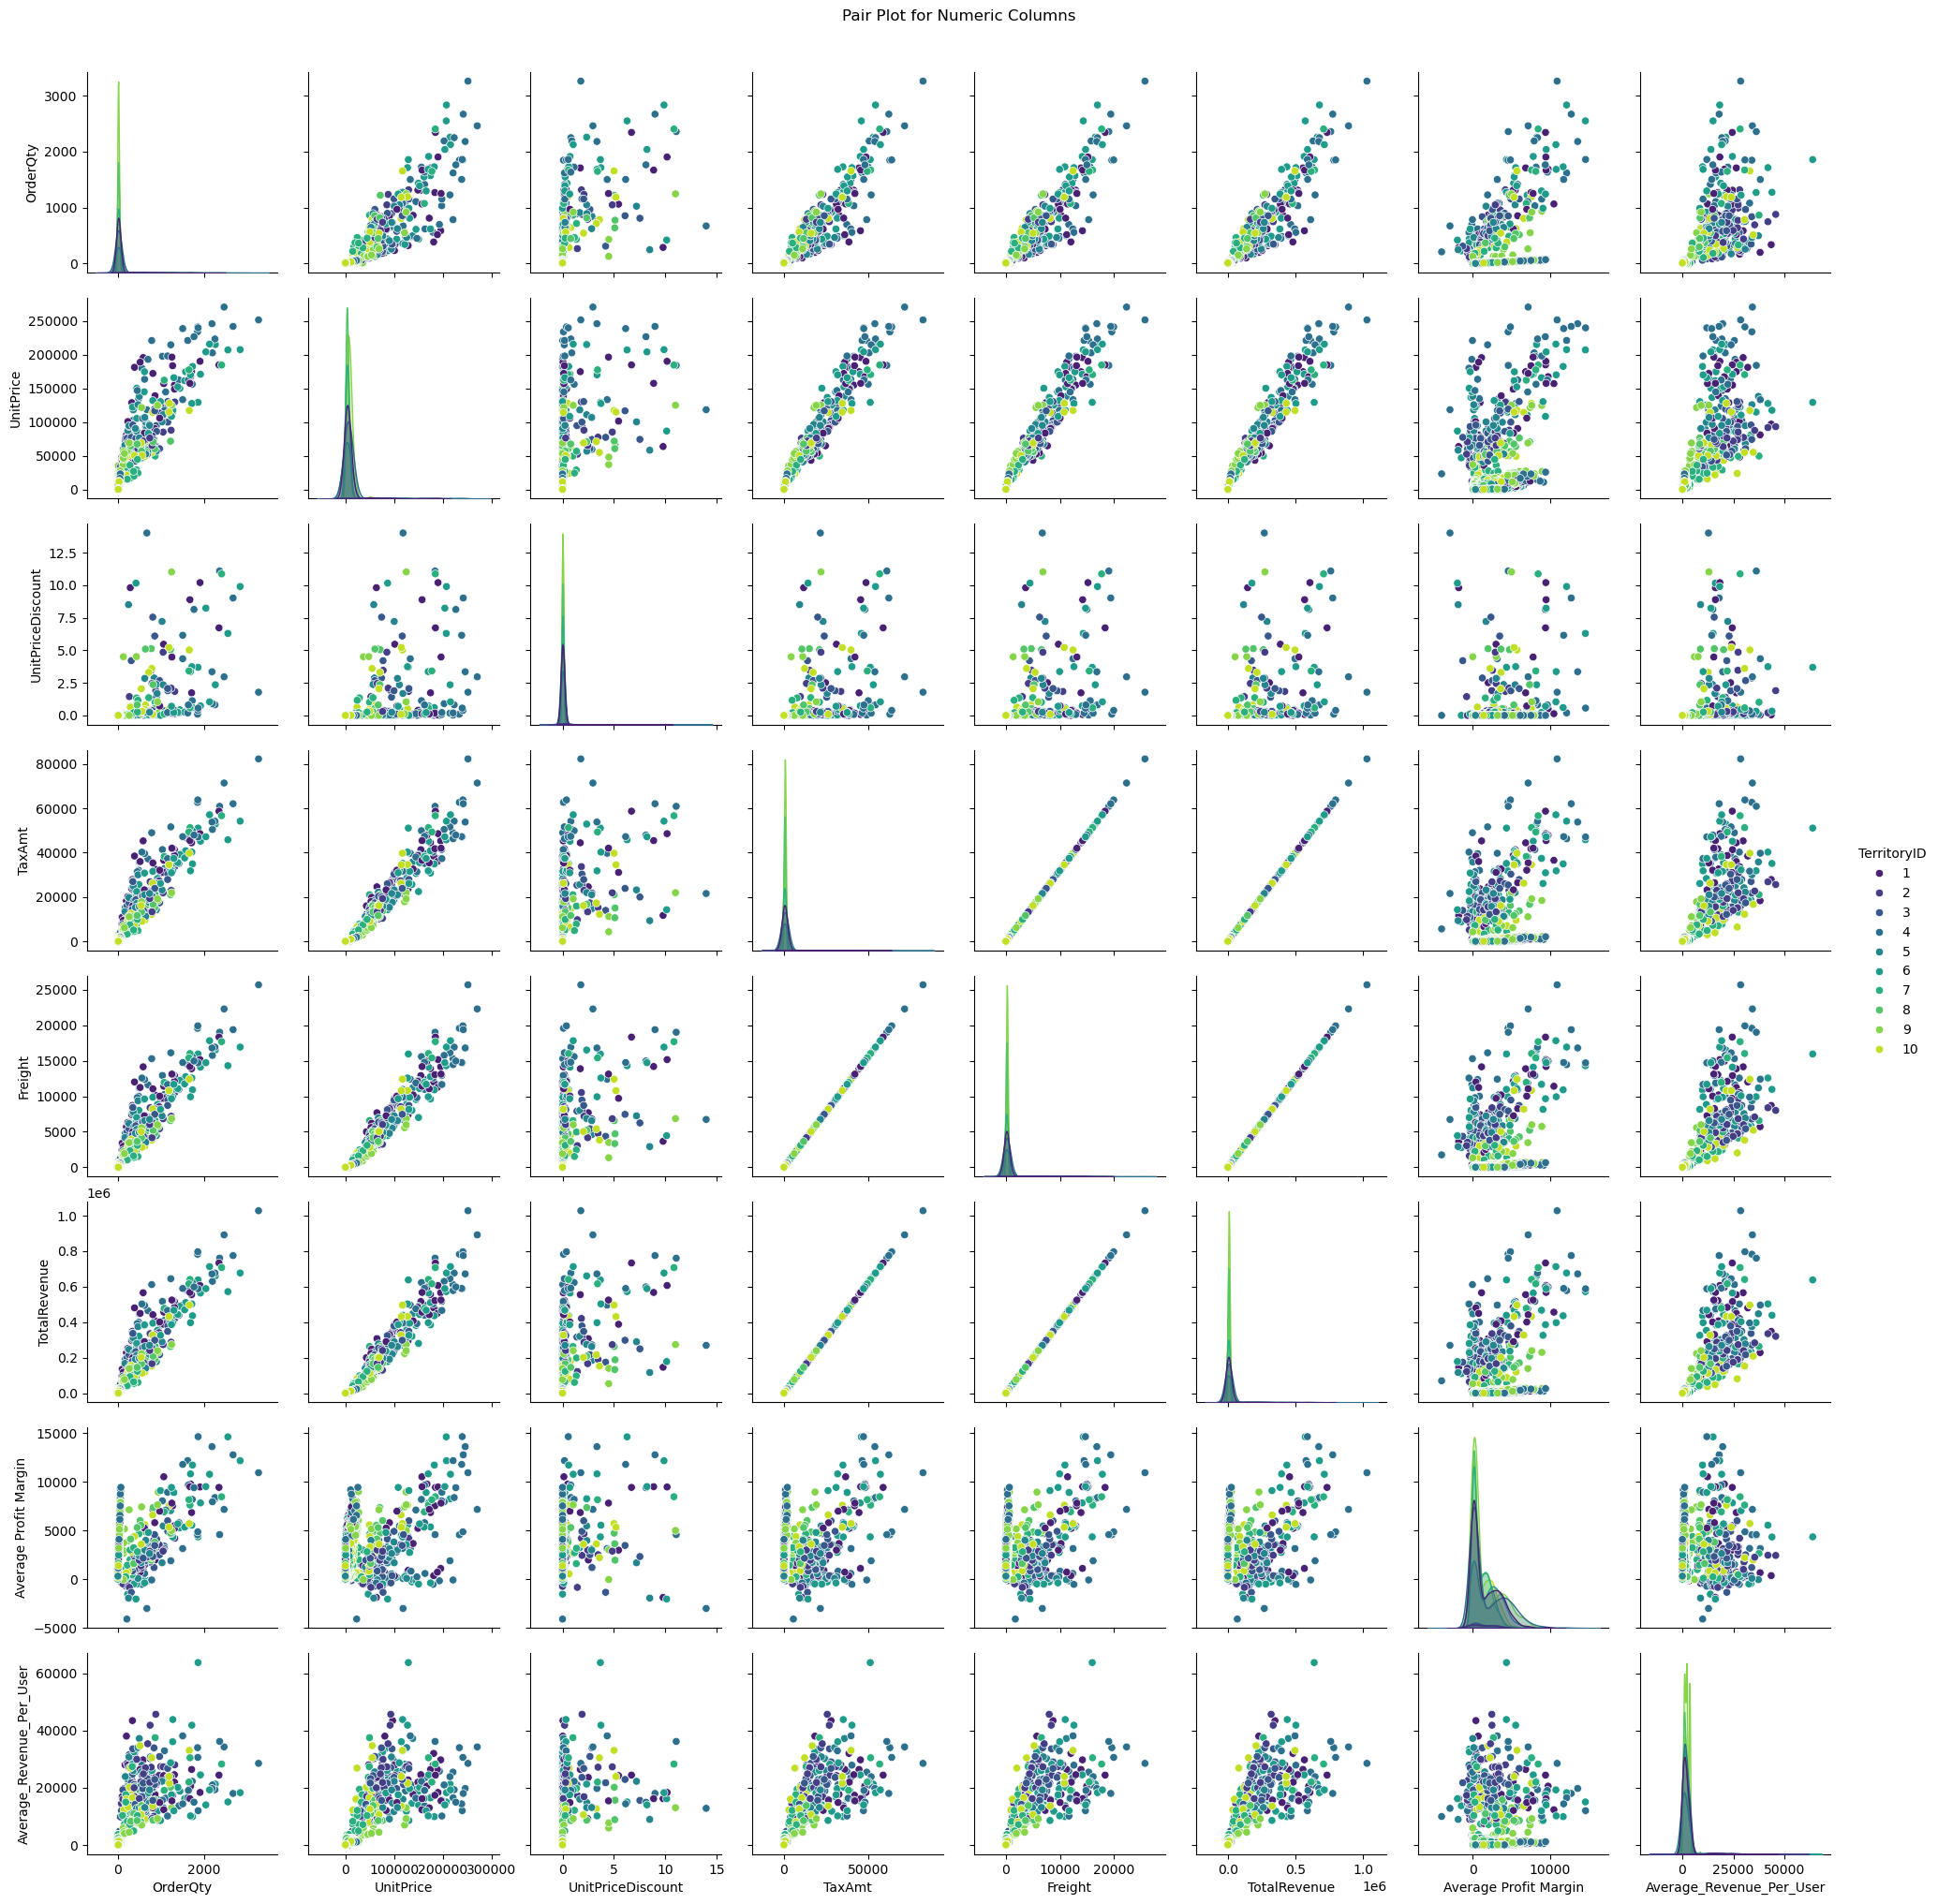

In [141]:
# Pair plots for numeric columns
sns.pairplot(df, hue='TerritoryID', palette='viridis')
plt.suptitle("Pair Plot for Numeric Columns", y=1.02)
plt.show()


In [142]:
grouped_data = df.groupby('TerritoryID', observed=False).agg({
    'TotalRevenue': 'sum',
    'Average Profit Margin': 'mean',
    'OrderQty': 'sum'
}).reset_index()
print(grouped_data)


  TerritoryID  TotalRevenue  Average Profit Margin  OrderQty
0           1  1.608494e+07            1573.725813   36776.0
1           2  6.931623e+06            1343.498090   19827.0
2           3  7.909009e+06            1430.794573   19493.0
3           4  2.415361e+07            1886.438084   59075.0
4           5  7.865868e+06            1379.744686   18831.0
5           6  1.634666e+07            1924.894059   49381.0
6           7  7.251556e+06            1048.182774   19906.0
7           8  4.915408e+06             984.512576   13143.0
8           9  1.065534e+07            1533.006832   18293.0
9          10  7.670721e+06            1163.803829   20099.0


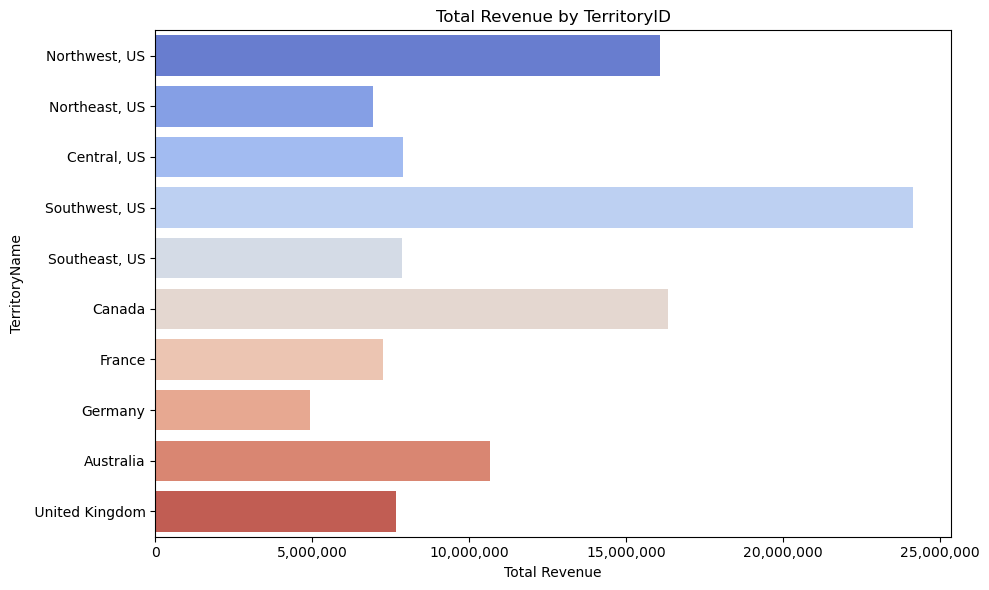

In [143]:
import matplotlib.ticker as ticker
# Bar plot: Total TotalRevenue per TerritoryID
plt.figure(figsize=(10, 6))

grouped_data = df.groupby('TerritoryName', observed=False)['TotalRevenue'].sum().reset_index()
ax = sns.barplot(data=grouped_data, y='TerritoryName', x='TotalRevenue', hue='TerritoryName', legend=False, palette='coolwarm', dodge=False)

# Customize the x-axis tick labels to show full numbers with commas
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))  # Format as thousands with commas

plt.title('Total Revenue by TerritoryID')
plt.xlabel('Total Revenue')
plt.tight_layout()
plt.show()


In [144]:
features = ['TotalRevenue', 'Average Profit Margin','Average_Revenue_Per_User']

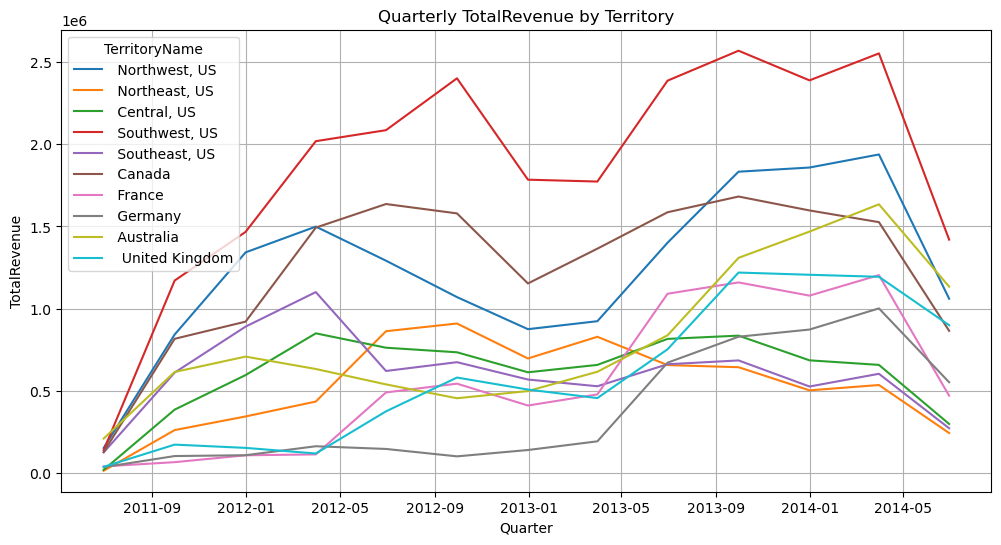

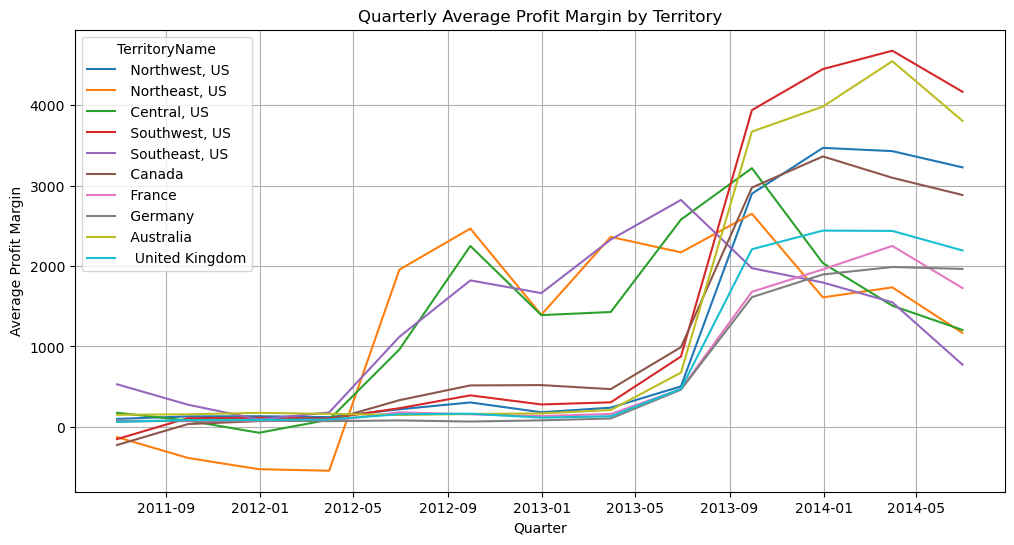

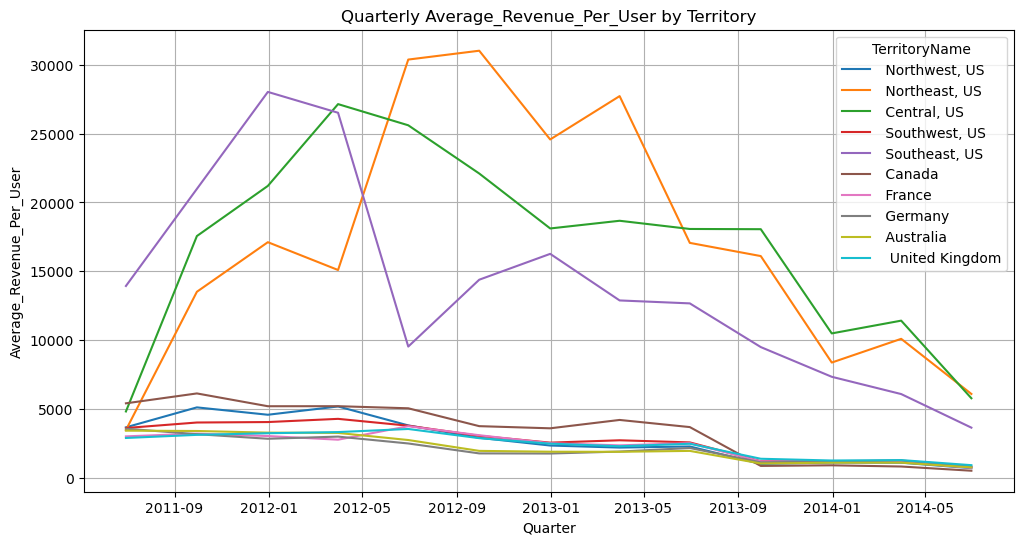

In [145]:
# Resample data to quarterly frequency and aggregate
quarterly_data = (
    df.groupby(['TerritoryName', pd.Grouper(freq='QE')], observed=True)  # 'Q' for quarterly aggregation
    .agg({
        'TotalRevenue': 'sum',
        'Average Profit Margin': 'mean',
        'Average_Revenue_Per_User': 'mean'
    })
    .reset_index()
)

# Ensure all territories are included and group by both Quarter and TerritoryID
quarterly_data = quarterly_data.groupby(['OrderDate', 'TerritoryName'], observed=True).sum().reset_index()

# Plot the data
for feature in features:
    plt.figure(figsize=(12, 6))
    for territory in quarterly_data['TerritoryName'].unique():
        # Filter data for the current territory
        territory_data = quarterly_data[quarterly_data['TerritoryName'] == territory]
        if not territory_data.empty:  # Ensure there is data to plot
            plt.plot(territory_data['OrderDate'], territory_data[feature], label=f' {territory}')
    
    # Plot details
    plt.title(f'Quarterly {feature} by Territory')
    plt.xlabel('Quarter')
    plt.ylabel(feature)
    plt.legend(title='TerritoryName')
    plt.grid()
    plt.show()

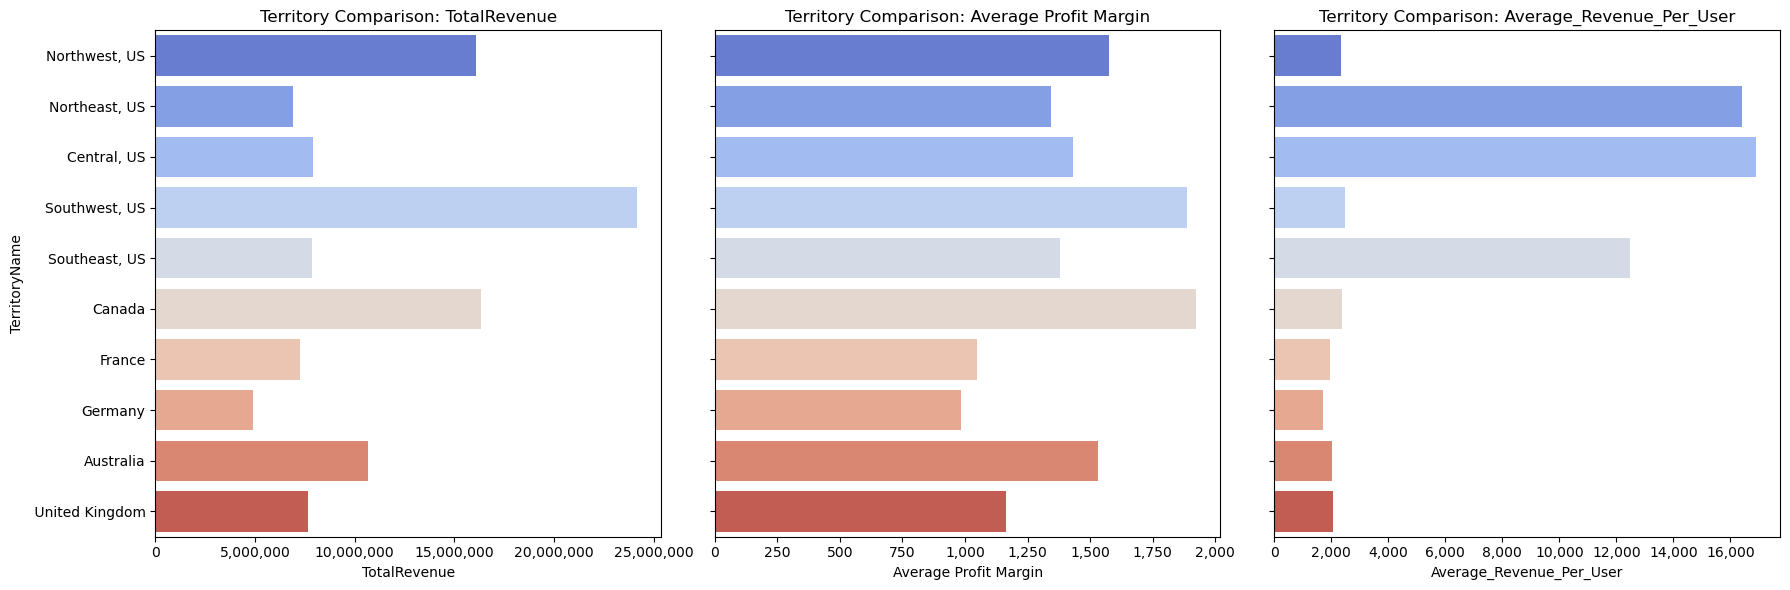

In [146]:
features = ['TotalRevenue', 'Average Profit Margin', 'Average_Revenue_Per_User']

territory_comparison = (
    df.groupby(['TerritoryName'], observed=True)  # 'Q' for quarterly aggregation
    .agg({
        'TotalRevenue': 'sum',
        'Average Profit Margin': 'mean',
        'Average_Revenue_Per_User': 'mean'
    })
    .reset_index()
)

# for feature in features:
#     sns.barplot(territory_comparison, y='TerritoryName', x=feature, hue='TerritoryName', legend=False, palette='viridis')
#     plt.title(f'Territory Comparison: {feature}')
#     plt.xlabel('TerritoryName')
#     plt.ylabel(feature)
#     plt.tight_layout()
#     plt.show()

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # Adjust figsize as needed

# Loop through each feature and plot on the corresponding axis
for i, feature in enumerate(features):
    sns.barplot(
        data=territory_comparison,
        y='TerritoryName',
        x=feature,
        hue='TerritoryName',
        palette='coolwarm',
        ax=axes[i]  # Specify the axis for each plot
    )
    axes[i].set_title(f'Territory Comparison: {feature}')
    axes[i].set_xlabel(feature)
    # axes[i].set_ylabel('TerritoryName' if i == 0 else '')  # Only show y-axis label on the first plot
    axes[i].set_ylabel('TerritoryName')

    # Format x-axis values with commas
    axes[i].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    
    # Only remove the legend if it exists
    if axes[i].get_legend() is not None:
        axes[i].legend().remove()  # Remove redundant legends

# Adjust layout for clarity
plt.tight_layout()
plt.show()

### Hypothesis Testing

Do different territories have significantly different average profit margins?

In [214]:
import pingouin as pg

# Perform Welch's ANOVA for each metric
welch_anova1 = pg.welch_anova(dv='Average Profit Margin', between='TerritoryName', data=df)
print(welch_anova1)

welch_anova2 = pg.welch_anova(dv='Average_Revenue_Per_User', between='TerritoryName', data=df)
print(welch_anova2)

welch_anova3 = pg.welch_anova(dv='TotalRevenue', between='TerritoryName', data=df)
print(welch_anova3)

# Extract the p-values
p_value1 = welch_anova1['p-unc'][0]
p_value2 = welch_anova2['p-unc'][0]
p_value3 = welch_anova3['p-unc'][0]

# Apply Bonferroni correction for multiple comparisons
alpha = 0.05
corrected_alpha = alpha / 3  # Bonferroni correction for 3 tests

# Conclusion based on the corrected p-values
if (p_value1 < corrected_alpha) & (p_value2 < corrected_alpha) & (p_value3 < corrected_alpha):
    print("\nConclusion: All three p-values are less than the corrected alpha (0.05/3).")
    print("There are significant differences in all three sales metrics between territories.")
elif (p_value1 < corrected_alpha) | (p_value2 < corrected_alpha) | (p_value3 < corrected_alpha):
    print("\nConclusion: At least one p-value is less than the corrected alpha (0.05/3).")
    print("There are significant differences in at least one of the sales metrics between territories.")
else:
    print("\nConclusion: None of the p-values are less than the corrected alpha (0.05/3).")
    print("There are no significant differences in the three sales metrics between territories.")

          Source  ddof1       ddof2          F         p-unc       np2
0  TerritoryName      9  471.185864  26.073329  1.736547e-36  0.034054
          Source  ddof1       ddof2          F         p-unc       np2
0  TerritoryName      9  461.274227  28.288021  4.340132e-39  0.219155
          Source  ddof1       ddof2          F         p-unc       np2
0  TerritoryName      9  461.508441  32.019794  1.437049e-43  0.104154

Conclusion: All three p-values are less than the corrected alpha (0.05/3).
There are significant differences in all three sales metrics between territories.


In [224]:
df.groupby('TerritoryName')['Average Profit Margin'].describe()

/var/folders/pf/4hxrldrx2g7g5x19dwlvk36w0000gn/T/ipykernel_43230/3252569704.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('TerritoryName')['Average Profit Margin'].describe()


,count,mean,std,min,25%,50%,75%,max
TerritoryName,,,,,,,,
"Northwest, US",824.0,1573.725813,1880.350906,-1852.503034,64.798948,279.399121,2905.149796,10534.261087
"Northeast, US",46.0,1343.498090,1590.261109,-817.843669,-88.752221,1034.134134,2679.511522,4694.051321
"Central, US",45.0,1430.794573,1601.270099,-1325.285261,174.893383,913.359578,2345.983308,6018.153525
"Southwest, US",921.0,1886.438084,2463.762896,-4072.209214,64.798948,194.396844,3718.055922,14655.250898
"Southeast, US",52.0,1379.744686,1510.529677,-1918.256273,175.514215,619.156647,2602.044166,5487.387374
Canada,638.0,1924.894059,2027.691797,-2016.585580,64.798948,1775.156803,3159.459684,14635.229360
France,724.0,1048.182774,1214.251726,29.870130,64.798948,502.127559,1817.945115,8486.884616
Germany,736.0,984.512576,1162.669664,40.298109,64.798948,364.621084,1706.565985,7375.137770
Australia,1058.0,1533.006832,2036.190603,-16.980694,129.597896,232.365787,3086.399280,9001.982760


In [233]:
# Define two groups
group1 = df[df['TerritoryName'] == 'Southwest, US']['Average Profit Margin'].dropna()
group2 = df[df['TerritoryName'] == 'Australia']['Average Profit Margin'].dropna()

# Perform Yuen's t-test with 20% trimming
result = pg.ttest(group1, group2, correction=False)
result

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.492832,1977,two-sided,0.000488,"[154.99, 551.88]",0.157408,21.201,0.937136


In [226]:
import numpy as np

# Define two groups
group1 = df[df['TerritoryName'] == 'Northwest, US']['Average Profit Margin'].dropna()
group2 = df[df['TerritoryName'] == 'Northeast, US']['Average Profit Margin'].dropna()

# Bootstrap resampling
n_iterations = 10000
bootstrap_diff = []

for _ in range(n_iterations):
    sample1 = np.random.choice(group1, size=len(group1), replace=True)
    sample2 = np.random.choice(group2, size=len(group2), replace=True)
    bootstrap_diff.append(np.mean(sample1) - np.mean(sample2))

# Calculate 95% confidence interval
lower = np.percentile(bootstrap_diff, 2.5)
upper = np.percentile(bootstrap_diff, 97.5)

print(f"95% confidence interval for the difference: ({lower:.2f}, {upper:.2f})")

95% confidence interval for the difference: (-238.98, 707.17)
